# **Chap1：深度学习框架和理论概述**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from source.code import ch1
from source.code import utils

2023-07-06 22:28:53.540948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 22:28:53.675521: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-06 22:28:53.707895: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-06 22:28:54.425532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
# 如果你要在服务器上和别人共用GPU，可以设置你需要的显存资源
utils.gpu_limitation_config(memory=12)

## **1 神经网络和深度学习**

### **1.1 第一次寒冬**

一个机器学习算法的能力很大程度上取决于**它的非线性学习能力**，决策树类模型相比线性模型拥有更强的非线性归纳能力，因此成为了目前统计学习的主流算法之一，**感知机**（**Inceptron**）作为神经网络的前身，回顾其决策函数 $f(x)$ 的形式：

$$
f(x) = w^Tx + b,\quad x,w\in\mathbb{R}^p,b\in\mathbb{R}
$$

感知机是一个**线性模型**，它**没有任何的非线性拟合能力**. 感知机刚被提出时，还是受到了很多机器学习研究者的关注，并在实践中取得了不错的效果，并基于此设计了一类统计性质更好的模型，即**支持向量机**（**SVM**）. 

但人们很快意识到，感知机在理论上有一个致命的弱点，即对于最基本的，**只包含四个样本的异或问题**(**XOR**)，感知机无法拟合

$$
y = x_1\text{ XOR } x_2 =  \left\{
\begin{array}{ll}
0, & x_1 = 0, x_2 = 0,\\
1, & x_1 = 1, x_2 = 0,\\
1, & x_1 = 0, x_2 = 1,\\
0, & x_1 = 1, x_2 = 1.\\
\end{array}
\right.
$$

**XOR**样本如下图所示，从感知机的角度思考，我们**无法找到一条直线，将两类样本分隔开**

<img src="../source/Chap1/XOR.png" width=500>

**XOR问题的提出暴露了感知机对于非线性问题的致命弱点**，学者和工程人员很快对此类算法失去兴趣，连如此简单的XOR问题都无法拟合，更何谈真实生活中存在的各种复杂的，非线性性质更强的其他问题，从深度学习的发展历史来看，这可以视为**第一次寒冬**

SVM虽然发展自感知机，但后面统计上**核函数的引入使SVM具备了非线性拟合能力**，因此在接下来的一段时间里，SVM成为了统计学习领域的明星，它优秀的统计学性质和强大的非线性学习能力在机器学习领域一直备受青睐，直到现在在大部分机器学习任务中也有很好的表现

### **1.2 激活函数和神经元**

后来人们发现，可以在感知机的基础上，人为**引入一次非线性变换** $\sigma$，最终得到的决策函数 $f$ 就具有了非线性拟合能力：

$$
z = \sigma{(w_1^T x + b_1)},\quad x\in\mathbb{R}^p,w_1\in\mathbb{R}^{p\times q},b_1\in\mathbb{R}^q\\
f(x) = w_2^Tz + b_2,\quad z\in\mathbb{R}^q,w_2\in\mathbb{R}^{q},b_2\in\mathbb{R}
$$

其中，$\sigma:\mathbb{R}\to\mathbb{R}$ 为非线性映射，最初人们选择的非线性映射是**Sigmoid**变换：

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \in (0,1)
$$

Sigmoid函数如下图所示：

Text(0.5, 1.0, 'The Sigmoid Function')

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


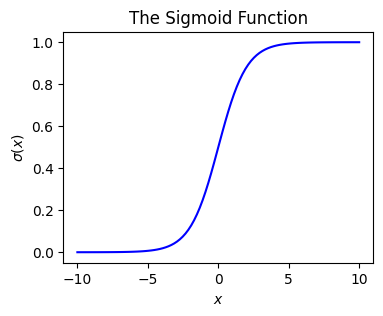

In [5]:
x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))
fig = plt.figure(figsize=(4,3))
plt.plot(x,y,color="blue")
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")
plt.title("The Sigmoid Function")

Sigmoid函数在 $x$ 较大时，整个函数值趋于1，在 $x$ 较小时，函数值趋于0，基于这种特性考虑如下场景，对于 $z\in\mathbb{R}^q$ 的某个分量 $z_i$，它会根据 $x,w_1$ 的变换改变其状态，我们用 $w_{1,.,i}$ 表示 $w_1\in\mathbb{R}^{p\times q}$ 的第 $i$ 列，则：
$$
z_i = \sigma(w_{1,.,i}^Tx + b_i)
$$

* 如果 $w_{1,.,i}^Tx + b_i < -5$，则此时 $z_i \to 0$，在最终决策函数 $f(x)$ 中，$w_{2,i}z_i \to 0$，$z_i$ 对预测的贡献很小，$z_i$ 就像**被抑制了**
* 如果 $w_{1,.,i}^Tx + b_i > 5$，则此时 $z_i \to 1$，在最终决策函数 $f(x)$ 中，$w_{2,i}z_i \to w_{2,i}$，$z_i$ 对预测的贡献得以体现，$z_i$ 就像**被激活了**

人们根据上述计算过程，给非线性映射 $\sigma$ 取了个形象的名字：**激活函数**（**Activation Function**）

决策函数 $f(x)$ 的计算过程如下图所示：

<img src="../source/Chap1/神经网络示意图.png" width=500>

通常，对于如上结构，我们从左到右分别称为**输入层**，**隐藏层**和**输出层**
* 输入层：特征 $x$ 构成模型的输入
* 隐藏层：经过一次线性变换和一次非线性映射 $\sigma$ 后得到的向量 $z\in\mathbb{R}^q$ 称为隐藏层
* 输出层：隐藏层经过一次线性变换得到决策函数的输出 $f(x)$

人们类比神经科学中的概念和性质，对以上结构进行形象解释：
* 每一个 $z_i\in (0,1)$ 就**像一个神经细胞**，可以接受外界刺激（接受 $x$），处于**兴奋**或**抑制**两种状态，因此被称为**神经元**
* $x\to z\to f$ 之间的线性变换参数 $w_1,w_2$ 就**像连接神经元的突触**，用于“**传导信号**”
* **神经元**（包含输入单元，隐藏单元）和**突触**（即模型的参数）共同**构成一个复杂的决策网络**，人们将其称为**神经网络**（**Neural Network**）

注意，虽然人们将这种模型称为**人工神经网络**（**Artificial Neural Network**，简称**ANN**），并赋予了相应的神经科学解释，但ANN的设计并没有明确信息表明启发于神经科学

结构，参数和激活函数是ANN的最基本单元，后续我们讨论和学习ANN模型，最核心的就是需要明白：
* **模型的计算结构是什么样子**
* **模型包含哪些参数**

在层与层的连接中，通常会使用映射 $w^Tz+b$，其中，两种参数 $w,b$ 分别称为**权重**（**weights**）和**偏置**（**bias**）

最后，ANN从被设计出来，其展现出强大潜力的一个原因在于它的**通用近似能力**，Pinkus证明了，如上介绍的单隐藏层神经网络可以一致地逼近任意函数

**(Thm) ANN通用近似定理**：简单来说，对任意函数 $f:\mathbb{R}^p\to \mathbb{R}$，任意紧集 $K\sub\mathbb{R}^p $ 和任意 $\varepsilon > 0$，激活函数 $\sigma$ 不是多项式函数，则只要 $q$ 充分大，在ANN张成的函数空间 $\mathcal{S}$ 中，存在 $g\in\mathcal{S}$，使得：
$$
|f(x) - g(x)| <\varepsilon, \quad \forall x\in K
$$

上述定理表明，对于**任何困难的非线性函数关系** $f$，**即使使用上述最简单的神经网络结构**，**只要隐藏神经元足够多**，**并且能找到正确的参数**，**我们就能逼近** $f$ **到任意精度**，通用近似定理非常吸引人

然而，理想很丰满，现实很骨感. 实际操作中，人们发现并不是简单增加 $q$ 就能打遍天下无敌手。ANN还需要针对不同问题，设计不同的模型架构，以最大化发挥神经网络的潜力，提升模型的性能，而**设计ANN结构就成为了神经网络，乃至后续深度学习最重要，最困难的一部分**

### **1.3 第二次寒冬和深度学习**

然而，在实际模型设计过程中，人们发现单纯增加隐藏神经元的个数（即增大 $q$）并不能取得明显提升，相反，**增加隐藏层的数目似乎对模型拟合能力的提升更明显**，即我们**需要一个更深的网络，而不是更宽的网络**. 这就是下图所示的**多层感知机**（**MultiLayer Perceptron**，简称**MLP**）

<img src="../source/Chap1/MLP.png" width=800>

上图展示了**包含3个隐藏层的MLP**，对于MLP做一下补充说明：
* 由于相邻两层神经元彼此之间都通过某一个权重相连接，**MLP又称为全连接网络**（**Fully Connected Network**，简称**FCN**）
* 每一个隐藏层都必须施加某种激活函数 $\sigma$，**否则增加隐藏层数目，即增加深度是无意义的**，
  * 考虑一个两层网络，**不使用激活函数，忽略偏置项**，则：
    $$
    z = w_1^T x,\quad f = w_2^Tz,\quad f = w_2^T(w_1^T x) = (w_2^Tw_1^T) x
    $$
    上述从输入 $x$ 到输出 $f$ 的变换，等价于只使用一层线性变换 $w_3^T = w_2^Tw_1^T$ 实现：
    $$
    f = w_3^Tx
    $$
    因此，在不使用非线性激活函数时，**任意层数的叠加也可以简单地表示为一层线性变换，模型的非线性学习能力没有提升**

**MLP的提出并没有就引出深度学习的概念**，就当时而言，**MLP大多也就使用3层左右隐藏层**，模型的拟合能力就接近饱和，继续增加层数也没有在各种任务中有新的突破

在21世纪初，机器学习进入了“**第二次寒冬**”，在这一段时间内人们面对的主要阻碍有：
* 模型在简单数据集上的表现已经接近饱和（例如手写数字识别数据集MNIST），但**在一些困难任务上没有突破性进展**，例如复杂图像分类（ImageNet数据集）
* 互联网技术正在处于快速发展阶段，**各种非结构化的数据（图片、文本、音视频、网络）的生产和采集，相比现在而言不太便利**，而**模型需要依靠数据驱动**
* **以GPU为代表的高性能计算技术也处于发展的萌芽阶段**，即使拥有海量数据和天马行空的模型设计，**计算硬件可能也吃不消**

真正将深度学习引爆，并确定深度学习这个概念的，有两个典型事件：
* 2012年，Hinton（深度学习奠基人之一）和他的学生Alex Krizhevsky设计一个**图像分类神经网络模型AlexNet**，取得当年ImageNet图像分类竞赛冠军，并远超其他模型. **AlexNet模型共包含8层，拥有约6000w个可学习参数**，这个参数规模在当时对于其它机器学习模型是难以想象的，AlexNet的两个贡献在于
  * 引入了一系列深度学习**模型训练技巧**（**Tricks**），这些技巧很多沿用至今或经过改进，人们发现这些技巧对于成功训练一个深度模型非常重要
  * 首次提出新的神经网络模型结构，即卷积神经网络（**Convolution Neural Network**，简称**CNN**）
* 2016年，由Google的DeepMind公司开发的智能模型AlphaGo击败李世石，随后，该程序在中国棋类网站上以Master为注册账号与中日韩数十位围棋高手进行快棋对决，连续60局无一败绩，**AlphaGo背后的技术是结合强化学习的神经网络**，其展现出的非凡能力再次吸引众多学者开始研究神经网络模型

自AlexNet开始，神经网络模型**在各种非结构化数据任务上展现惊人的能力**，包含计算机视觉（图像分类，语义分割，目标检测，图像生成），自然语言处理（机器翻译，多轮对话QA），这些极其困难的非线性任务是其他任何机器学习算法都无法应对的，并且神经网络拥有高度统一的整体架构，使得它扩展性强，学习成本相对较小. 同时，模型的”深度“”或者说“复杂度”也以指数速度上升，参数的规模从最初的几百万到现在的上千亿，神经网络真正成为了“深度学习模型”

----

## **2 机器学习三要素**

ANN也算是机器学习模型的一种，因此ANN自然也有机器学习三要素：**模型**，**策略**和**算法**

我们以一个最简单的回归问题为例，说明ANN的机器学习三要素

In [6]:
N = 200 # 样本量
x = np.random.uniform(low=-2,high=2,size=N)
x = np.sort(x)
noise = np.random.randn(N) * 0.3 # 高斯噪声
y = np.sin(2*x) * np.exp(-x/2) + noise # 带有噪声的标签
func = np.sin(2*x) * np.exp(-x/2) # 真实函数

# 调整形状
x = x.reshape((-1,1))
y = y.reshape((-1,1))
func = func.reshape((-1,1))

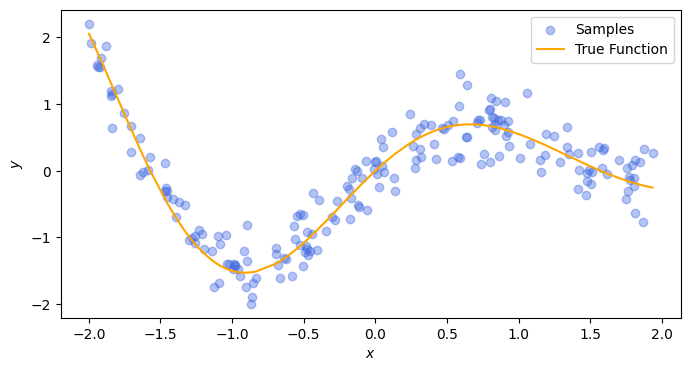

In [7]:
fig = plt.figure(figsize=(8,4))
plt.scatter(x,y,color="royalblue",alpha=0.4,label="Samples")
plt.plot(x,func,color="orange",label="True Function")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

### **2.1 ANN模型**

在ANN模型的部分，我们需要关注两个部分，**前向计算图**和**模型参数**：
* 神经网络的结构是什么样子？当给定输入 $x$ 后，要经过怎样的计算逻辑得到输出 $f(x)$，模型的计算过程通常又称为**前向计算图**
* 模型包含了哪些参数？这些参数中，**哪些是可训练的**（**trainalbe**）

我们定义一个单隐藏层神经网络，隐藏神经元个数为 `hidden_size` 可以控制，整个模型定义为一个类`class`，类的属性需要保存模型的参数信息

对于输入 $X\in \mathbb{R}^{N\times p}$ 和对应输出 $Y\in \mathbb{R}^{N\times o}$，$N$ 表示样本量，模型的前向计算图为：
$$
Y = f(X) = \left[ \sigma(Xw_1 + b_1)\right]w_2 + b_2,\quad w_1\in\mathbb{R}^{p\times q},w_2\in\mathbb{R}^{q\times o},b_1\in\mathbb{R}^q,b_2\in\mathbb{R}^o
$$

In [8]:
# 定义激活函数
def sigmoid(x : np.ndarray):
    return 1 / (1 + np.exp(-x))

In [9]:
class ANN:
    def __init__(self, input_dims : int=1, output_dims : int=1, hidden_size : int=8) -> None:
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.hidden_size = hidden_size
        
        # 第一层模型参数
        self.w1 = np.random.randn(input_dims,hidden_size)
        self.b1 = np.random.randn(hidden_size)

        # 第二层模型参数
        self.w2 = np.random.randn(hidden_size,output_dims)
        self.b2 = np.random.randn(output_dims)

    # 定义模型的结构，即前向计算图
    def __call__(self, X : np.ndarray, return_layer : bool=False) -> np.ndarray:
        # 如果 x 只有一个维度 (N,)，则为其添加一个维度变为 (N,1)
        try:
            assert X.ndim == 2
        except:
            X = X.reshape((-1,1)) # 添加一个维度
        
        # X 的形状为：(N, input_dims)
        h = X @ self.w1 + self.b1
        z = sigmoid(h) # 形状 (N, hidden_size)
        y = z @ self.w2 + self.b2 # 形状 (N, output_dims)
        if return_layer:
            return h, z, y
        else:
            return y

在我们的例子中，输入维度`input_dims = 1`，输出维度`output_dims = 1`，假设隐藏神经元使用8个，创建模型，测试神经网络的输出结果

In [10]:
# 创建模型
model = ANN(hidden_size=8)
# 测试模型输出
output = model(X=x[0:5])
print(output)

[[-1.54339717]
 [-1.54205623]
 [-1.53681169]
 [-1.53609409]
 [-1.53329438]]


### **2.2 ANN策略**

**策略对应模型所使用的损失函数**，用于**指导模型确定其包含的参数**，$\Theta$ 表示ANN模型 $f$ 包含的所有可训练参数，即 $f(x) = f(x;\Theta)$，不同的任务，不同的场景，ANN所使用的损失函数不同，但为了使ANN能够优化，一般来说，**损失函数至少几乎处处一阶可导**
* 回归任务常用的损失函数是**平方损失**：
    $$
    \ell(\Theta) = \frac{1}{N} \sum_{i=1}^{N} \left[ y_i - f(x_i;\Theta)\right]^2
    $$
* 分类任务常用的损失函数是**交叉熵损失函数**：
    $$
    \ell(\Theta) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} { \mathbb{I}(y_i = k)\cdot \log[f_k(x_i;\Theta)] }
    $$
    其中，$K$ 表示类别数量，$f_k(x_i)$ **是模型输出对第** $k$ **类的概率建模**

**注意**：**以上损失函数都可以看作特定分布假设下的负对数似然函数**

通常来说，**确定损失函数后，ANN的策略即求解损失函数** $\ell(\Theta)$ **关于参数** $\Theta$ **的极小值点**：

$$
\Theta^* = \mathop{\arg\min}\limits_{\Theta} \ell(\Theta)
$$

### **2.3 ANN算法**

**ANN统一使用梯度下降类方法**作为优化算法来求解关于参数 $\Theta$ 的极小化问题，这类算法经过多年的发展有几种成熟的变种，主要包含：
* **随机梯度下降SGD** 或 **批量随机梯度下降BSGD**
* RSMprop
* **自适应动量法Adam**

优化算法会在后面的专题中介绍，这里我们简单介绍梯度下降和随机梯度下降SGD

如果使用梯度下降法更新模型参数，则迭代步骤为：
$$
\Theta_{k+1} = \Theta_k - \eta\cdot \frac{\partial \ell}{\partial \Theta} = \Theta_k - \eta\cdot \frac{\partial }{\partial \Theta}\left( \frac{1}{N} \sum_{i=1}^{N} L(y_i,f(x_i;\Theta)) \right) = \Theta_k - \eta\cdot \frac{\partial }{\partial \Theta}\left( \frac{1}{N} \sum_{i=1}^{N} [y_i - f(x_i;\Theta)]^2 \right)
$$

其中，$\eta > 0$ 表示学习率，$L(y,f)$ 表示单样本损失函数

从损失函数的形式不难看出，使用**梯度下降法更新模型参数时，每次都需要计算损失函数关于每个样本的梯度**，这存在两个问题：
* **梯度的计算对于神经网络是昂贵的**，尤其当网络规模很大，结构很深，参数数量很多时，我们将在后面看到
* **每个样本的梯度存储需要花费空间**，而大数据时代，样本量 $N$ 可能很大（例如ImageNet数据集，样本量 $N$ 约为1400万），当模型参数量较大时，存储这些梯度信息需要花费大量的内存，以致于计算不可行

为此，人们提出**随机梯度下降**（**Stochastic Gradient Descent**，简称**SGD**）方法，**每次更新时，只随机抽取一个样本** $(x_j,y_j)$，然后更新：
$$
\Theta_{k+1} = \Theta_k - \eta\cdot \frac{\partial}{\partial \Theta} L(y_j,f(x_j;\Theta))
$$

**SGD的有效性通过下式保证**：
$$
\mathbb{E}_j \left( \frac{\partial}{\partial \Theta}L(y_j,f(x_j;\Theta)) \right) = \frac{1}{N} \sum_{i=1}^{N} \frac{\partial}{\partial \Theta} L(y_i,f(x_i;\Theta))
$$

简单来说，即**单样本梯度信息是对全样本梯度的无偏估计**，SGD相比梯度下降梯度计算时间加快 $N$ 倍，所需要的内存也相应减少

SGD在使用时有两个特点：
* 相比梯度下降的收敛速度会变慢，通常需要更多轮迭代才能让模型参数收敛
* 由于每次只使用一个样本的梯度信息，因此参数更新的**随机扰动会比较大**

SGD使用单样本梯度信息更新的**这种随机扰动，一方面给参数收敛带来了不确定性，但另一方面，随机性使模型的更新方向有更多可能，让模型具备突破局部极小值点陷阱的能力**

如果不想让参数更新抖动太过剧烈，实践中更常用的方法是**批量随机梯度下降**（**Batch SGD**），即每次更新时，**选择样本容量为** $B$ **的子集**，**称为一个批量（一个Batch）**，计算它们的梯度来进行更新：
$$
\Theta_{k+1} = \Theta_k - - \eta\cdot \frac{\partial }{\partial \Theta}\left( \frac{1}{B} \sum_{i=1}^{B} L(y_i,f(x_i;\Theta)) \right)
$$

**BSGD增加了SGD的稳定性，也保留了一部分随机性**，同时**根据硬件性能选择合适的批量大小** $B$，也能减少每次梯度计算的开销

最后，我们来计算**2.1节**模型中每一部分参数的梯度，这需要使用到**链式法则**，然后完成代码：

注意到：
$$
\begin{array}{l}
f(x_i) = z_i w_2 + b_2,\\
z_i = \sigma(h_i),\\
h_i = x_i w_1 + b_1 \\
\end{array}
$$

计算梯度得到：

$$
\begin{array}{rcl}
\displaystyle{ \frac{\partial L(y_i,f(x_i;\Theta))}{\partial w_1} } & = & \displaystyle{ 2\left[f(x_i;\Theta) - y_i \right] \frac{\partial f}{\partial w_1} }\\[4mm]
& = & \displaystyle{ 2\left[f(x_i;\Theta) - y_i \right] \frac{\partial f}{\partial z_i}\frac{\partial z_i}{\partial h_i}\frac{\partial h_i}{\partial w_1} }\\[4mm]
\end{array}
$$

$$
\begin{array}{rcl}
\displaystyle{ \frac{\partial L(y_i,f(x_i;\Theta))}{\partial b_1} } & = & \displaystyle{ 2\left[f(x_i;\Theta) - y_i \right] \frac{\partial f}{\partial b_1} }\\[4mm]
& = & \displaystyle{ 2\left[f(x_i;\Theta) - y_i \right] \frac{\partial f}{\partial z_i}\frac{\partial z_i}{\partial h_i}\frac{\partial h_i}{\partial b_1} }\\[4mm]
\end{array}
$$

$$
\begin{array}{rcl}
\displaystyle{ \frac{\partial L(y_i,f(x_i;\Theta))}{\partial w_2} } & = & \displaystyle{ 2\left[f(x_i;\Theta) - y_i \right] \frac{\partial f}{\partial w_2} }\\[4mm]
\end{array}
$$

$$
\begin{array}{rcl}
\displaystyle{ \frac{\partial L(y_i,f(x_i;\Theta))}{\partial b_2} } & = & \displaystyle{ 2\left[f(x_i;\Theta) - y_i \right] \frac{\partial f}{\partial b_2} }\\[4mm]
\end{array}
$$

注意链式法则中，各个梯度的维度：
$$
\begin{array}{l}\
\displaystyle{ \frac{\partial f}{\partial w_2} = z_i^T \in \mathbb{R}^{q\times 1} }\\[4mm]
\displaystyle{ \frac{\partial f}{\partial b_2} = 1 }\\[4mm]
\displaystyle{ \frac{\partial f}{\partial z_i} = w_2^T \in \mathbb{R}^{1\times q} }\\[4mm]
\displaystyle{ \frac{\partial z_i}{\partial h_i} = \text{diag}\left( \sigma'(h_i)\right) \in \mathbb{R}^{q\times q} }\\[4mm]
\displaystyle{ \frac{\partial h_i}{\partial w_1} = \left[\frac{\partial h_{i,1}}{\partial w_1},\cdots,\frac{\partial h_{i,q}}{\partial w_1}  \right] \in \mathbb{R}^{q\times p\times q} }\\[4mm]
\displaystyle{ \frac{\partial h_i}{\partial b_1} = \left[\frac{\partial h_{i,1}}{\partial b_1},\cdots,\frac{\partial h_{i,q}}{\partial b_1}  \right] = \mathbf{E}_q \in \mathbb{R}^{q\times q} }\\[4mm]
\end{array}
$$

首先定义**损失函数**`loss_func()`

In [11]:
def loss_func(y_true : np.ndarray, y_pred : np.ndarray):
    return np.mean((y_true - y_pred)**2)

我们来实现批量随机梯度下降`BSGD()`：
* 在深度学习中，迭代轮次用`epochs`表示
* 在每一个`epoch`，我们随机打乱样本，然后依次选择批量大小为`B`的样本作为一个Batch，用它们的梯度信息更新参数
* 所有样本在一个`epoch`中会都参与一次计算，如果样本量`N`无法被批量大小`B`整除，则最后一个批量的样本量会小于`B`

函数`BatchGenerator()`用于从样本生成每个批量的数据，它是一个**生成器**，注意`yield`关键字

In [12]:
def BatchGenerator(x : np.ndarray, y : np.ndarray, batch_size : int=32):
    """
    从样本声从每个批量的数据
    """
    N = x.shape[0] # 样本量
    idx = np.random.permutation(N) # 生成随机索引
    rounds = int(N / batch_size) + 1
    for i in range(rounds):
        idx_batch = idx[i*batch_size:(i+1)*batch_size] # 生成随机批量索引
        # 抽取子集
        x_batch = x[idx_batch]
        y_batch = y[idx_batch]
        
        yield x_batch, y_batch

In [13]:
def BSGD(model : ANN, X : np.ndarray, y : np.ndarray, batch_size : int=32, epochs : int=200, lr : float=0.1):
    # 迭代轮次
    for epoch in range(epochs):
        # 该轮迭代的批量生成器
        batch_data = BatchGenerator(X,y,batch_size=batch_size)
        # 利用每个批量的数据计算梯度，并更新参数
        for x_batch, y_batch in batch_data:
            # 进行前向推理
            h, z, f = model(x_batch,return_layer=True) # 返回中间层结果
        
            # 计算梯度
            sigma_grad = sigmoid(h)*(1 - sigmoid(h))

            w2_grad = np.mean(2*(f - y_batch)*z,axis=0,keepdims=True).T
            b2_grad = np.mean(2*(f - y_batch),axis=0)

            df_dh = 2*(f - y_batch)*model.w2.T*sigma_grad
            w1_grad = np.mean(np.expand_dims(df_dh,1) *\
                              np.repeat(np.expand_dims(x_batch,axis=2),repeats=model.hidden_size,axis=2),axis=0)
            b1_grad = np.mean(df_dh,axis=0)

            # 梯度下降更新参数
            model.w1 -= lr*w1_grad
            model.b1 -= lr*b1_grad
            model.w2 -= lr*w2_grad
            model.b2 -= lr*b2_grad

        # 计算损失，并打印损失的值
        f = model(X)
        loss = loss_func(f,y)
        if epoch == 0 or (epoch + 1)%25 == 0:
            print("Epoch: %4d, loss: %.6f"%(epoch+1,loss))
        
    return model

最后，创建模型，调用`BSGD()`训练模型

In [14]:
model = ANN(hidden_size=8) # 创建模型
model = BSGD(model,x,y,epochs=200,lr=0.1) # 使用BatchSGD训练模型

Epoch:    1, loss: 0.835162
Epoch:   25, loss: 0.569696
Epoch:   50, loss: 0.273797
Epoch:   75, loss: 0.177572
Epoch:  100, loss: 0.117182
Epoch:  125, loss: 0.105270
Epoch:  150, loss: 0.099970
Epoch:  175, loss: 0.089067
Epoch:  200, loss: 0.087981


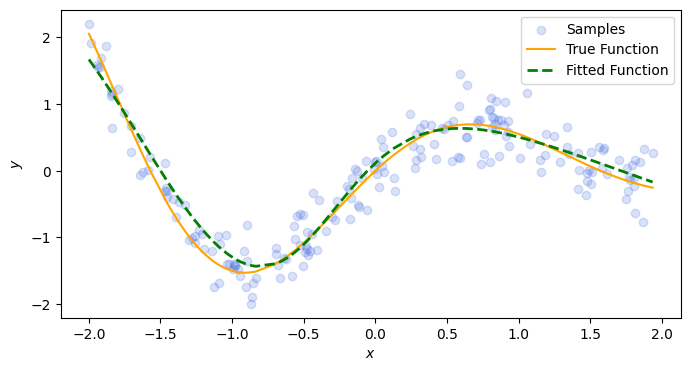

In [15]:
func_fit = model(x)
fig = plt.figure(figsize=(8,4))
plt.scatter(x,y,color="royalblue",alpha=0.2,label="Samples")
plt.plot(x,func,color="orange",label="True Function")
plt.plot(x,func_fit,lw=2,ls="--",color="green",label="Fitted Function")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

上述过程演示了计算梯度信息更新模型参数的方法，根据链式法则，逐层计算梯度的过程有以下两个特点：
* **需要先进行一次前向计算**，获得网络中每一层的输出结果
* **梯度的计算从后向前计算**，逐层累乘

因此，这种参数更新的过程又被人们称为**反向传播机制**，它和神经网络的前向推理顺序恰好相反，**梯度从最后一层逐步向输入层传播**

但**随着网络结构变得复杂，网络变深，上述梯度的计算无疑是痛苦的**，手工推导计算后再编写代码是不可行的

为此，人们设计了各种**深度学习框架**来帮助我们快速、高效实现各种神经网络模型，**避免上面实验中复杂的计算和编码流程**

----

## **3 深度学习应用和框架**

### **3.1 深度学习的应用领域**

深度学习模型的成功应用可以根据场景进行划分
* 计算机视觉领域（**Computer Vision**，**CV**）
  * 图像分类：给定图片，判断图片的主体是什么内容，完成分类任务，例如手写数字识别，动物识别，食材识别等，代表模型各类**卷积神经网络**（AlexNet，LeNet，ResNet）
  * 目标检测：给定图片，在图片上标识出各主体的位置，并对主体进行识别和判断，例如视频中对主体的跟踪就是目标检测的基本任务，代表模型**YOLO**系列算法
  * 语义分割：给定图片，将图像中各部分内容进行区分并解释其含义，例如区分一张风景照中的天空、游客、动物、树木等信息，代表模型**FCN**和**PSPNet**
  * 图像生成：按照人们需求生成现实生活中不存在的图像，例如风景，人脸，绘画作品等，代表模型**GAN**
* 自然语言处理（**Natural Language Processing**，**NLP**）
  * 序列建模：任何**具有前后逻辑关系的序列样本**都可以视为NLP问题，例如时间序列建模，这类任务包含序列预测，序列补全，或者是对整条序列分类，代表模型**RNN**，**GRU**，**LSTM**
  * 标记和解析：标记一段语句中的主语、动词，或者标记整个语句的情感，这是自然语言理解的基础，代表模型**Word2Vec**
  * 多模态识别（图像、语音，音乐，视频和代码映射到文本）：给定图像、语音和视频数据，让模型描述其内容，并总结输出，代表模型**以Transformer为基础的模型变种**
  * 多模态生成（文本映射到图像、语音，音乐，视频和代码）：相反，给定需求描述，让模型生成多模态内容，代表模型**以Transformer为基础的模型变种**
  * 机器翻译：让模型实现多种语言之间的互相翻译，或直接进行同声传译
  * 文本理解和多轮对话：交互式地与模型进行多轮对话，这要求模型具备上下文理解能力，代表模型**ChatGPT**
* 环境交互和强化学习
  * 推荐系统：电商系统、搜索引擎和流媒体平台对内容的排序和推荐，代表模型**NFM**
  * 社群发现：根据样本间的网络连接关系（例如好友网络，关注与被关注网络，论文引用网络），挖掘社群信息（包括结点预测、连接关系预测，图聚类），代表模型**GNN**
  * 智能AI / 游戏AI：**以AlphaGo为代表**的智能决策体，能够实时根据环境的反馈调整策略，代表模型**DQN**
  * 科学发现：**以AlphaFold为代表**的交叉学科模型，能够辅助科研人员进行科学理论的探索和发现

### **3.2 深度学习框架**

为了让人们方便地开发深度学习模型，各大公司设计了自己的**深度学习框架**，例如Tensorflow，Pytorch，MXNet，Caffe等

每个框架拥有自己的优点和特色，目前**最受欢迎的框架是Tensorflow和Pytorch**，框架的使用之间会有差别，但不会改变算法的流程，工业界和学界也都是使用这两个框架，Pytorch因其新旧版本之间舒适的继承性，现在受更多人的喜爱，在学习框架时，可以任选一个进行学习，另一个作为补充了解

本文模型的编写以Tensorflow框架展开

#### **3.2.1 自动梯度**

所有深度学习框架最基础最重要的功能之一就是**自动梯度**（**Automatic Gradient**），框架通过**构建计算图**的形式，追踪计算的结构和逻辑，然后通过反向传播，就可以得到输出层，或者任意中间层关于任何参数的梯度信息

下面，我们尝试计算：
$$
f(x,y,z) = g(x,y) + h(y,z),\quad g(x,y) = \sin(x\cdot y),\quad h(y,z) = \exp(-(y+z)) 
$$
的梯度信息，不难得到：
$$
\frac{\partial f}{\partial x} = y\cdot \cos(xy),\quad \frac{\partial f}{\partial y} = x\cdot \cos(xy) - \exp(-(y+z)),\quad \frac{\partial f}{\partial z} = - \exp(-(y+z))
$$

Tensorflow中，想要构建计算图并跟踪计算过程，需要**声明一个磁带** `tape`，通过`with`语句创建一个`scope`，`scope`**内的计算将会被Tensorflow跟踪**

In [16]:
# 创建变量
x = tf.Variable(np.array([0, np.pi/2, np.pi]),dtype=tf.float32) # x = [0, pi / 2, pi]
y = tf.Variable(np.array([0, 2, -1]),dtype=tf.float32) # y = [0, 2, 1]
z = tf.Variable(np.array([0, -2, 1]),dtype=tf.float32) # z = [0, -2, -1]

In [17]:
# 创建scope，设置persistent = True可以调用多次求导
with tf.GradientTape(persistent=True) as tape:
    # 在scope内部定义计算逻辑
    g = tf.sin(x*y)
    h = tf.exp(-(y+z))
    f = g + h
# 定义在scope外的计算，无法追踪梯度
f_out = g + h

In [18]:
# 计算梯度
df_dx = tape.gradient(f,x)
df_dz = tape.gradient(f,z)
df_dg = tape.gradient(f,g)
df_dh = tape.gradient(f,h)
dg_dy = tape.gradient(g,y)
dg_dz = tape.gradient(g,z)
dh_dx = tape.gradient(h,x)
# 打印梯度
print("df / dx: ",df_dx)
print("df / dz: ",df_dz)
print("df / dg: ",df_dg)
print("df / dh: ",df_dh)
print("dh / dy: ",dg_dy)
print("dg / dz: ",dg_dz)
print("dh / dx: ",dh_dx)

df / dx:  tf.Tensor([ 0. -2.  1.], shape=(3,), dtype=float32)
df / dz:  tf.Tensor([-1. -1. -1.], shape=(3,), dtype=float32)
df / dg:  tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)
df / dh:  tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)
dh / dy:  tf.Tensor([ 0.        -1.5707964 -3.1415927], shape=(3,), dtype=float32)
dg / dz:  None
dh / dx:  None


可以观察到，**自动梯度计算正确**，并且**由于** $g$ **与** $z$ **无关**，$h$ **与** $x$ **无关**，因此**梯度信息** $\partial g/\partial z,\partial h/\partial x$ **不存在**

对于**定义在**`tape`**对应的**`scope`**外的计算，因为计算图没有追踪它的计算逻辑，我们无法得到它的梯度**

In [19]:
df_out_dx = tape.gradient(f_out,x)
print("df_out / dx: ",df_out_dx)

df_out / dx:  None


自动梯度在模型特别复杂时非常有用，我们无需关心反向传播过程，Tensorflow会创建计算图跟踪好每个参数的梯度

#### **3.2.2 低层级API**

Tensorflow的低层级API能够让我们从**模型包含的参数**和**计算逻辑**出发，细致定义每一个模型，它能够实现对计算过程的精确控制，也是学习深度学习模型，了解每个算法的计算逻辑的最推荐的实现方式

为了养成良好的编码习惯，建议将所有的自定义模型继承自`tf.keras.Model`或者`tf.keras.layers.Layer`，后者是神经网络中**层**的基本单元

我们使用低层级API定义`LowAPIANN`来实现**第2节中的单隐藏层神经网络**

首先，**重新定义激活函数，损失函数，批量数据生成函数，必须使用Tensorflow的接口完成计算**

In [20]:
def sigmoid_tf(x : tf.Variable):
    return 1 / (1 + tf.exp(-x))

def loss_func_tf(y_true : tf.Variable, y_pred : tf.Variable):
    return tf.reduce_mean((y_true - y_pred)**2)

def BatchGenerator_tf(x : np.ndarray, y : np.ndarray, batch_size : int=32):
    return tf.data.Dataset.from_tensor_slices((x,y)).batch(batch_size).shuffle(x.shape[0])

In [21]:
class LowAPIANN(tf.keras.Model):
    def __init__(self, input_dims : int=1, output_dims : int=1, hidden_size : int=8, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.hidden_size = hidden_size

        # 声明为 tf.Variable
        self.w1 = tf.Variable(np.random.randn(input_dims,hidden_size),dtype=tf.float32,name="w1")
        self.b1 = tf.Variable(np.random.randn(hidden_size),dtype=tf.float32,name="b1")
        self.w2 = tf.Variable(np.random.randn(hidden_size,output_dims),dtype=tf.float32,name="w2")
        self.b2 = tf.Variable(np.random.randn(output_dims),dtype=tf.float32,name="b2")
    
    def call(self, inputs, training=None, mask=None):
        h = inputs @ self.w1 + self.b1
        z = sigmoid_tf(h)
        y = z @ self.w2 + self.b2
        return y

In [22]:
# BatchSGD 训练模型
def train(model, X : tf.Tensor, y : tf.Tensor, batch_size : int=32, epochs : int=200, lr : float=0.1):
    for epoch in range(epochs):
        # 该轮迭代的批量生成器
        batch_data = BatchGenerator_tf(X,y,batch_size=batch_size)
        for x_batch, y_batch in batch_data:
            # 跟踪梯度
            with tf.GradientTape() as tape:
                y_hat = model(x_batch)
                loss = loss_func_tf(y_batch,y_hat)
            
            # 选取参数，计算梯度
            weights = model.trainable_variables
            grads = tape.gradient(loss,weights)
            # 梯度下降更新参数
            for weight, grad in zip(weights,grads):
                # assign_sub 等价于 weight 自身减去这个更新量
                # Tensorflow 参数不允许使用 weight -= lr*grad 这种语法
                weight.assign_sub(lr*grad)
    
    return model

In [23]:
# 生成数据
x, y, func = ch1.build_regression(N=200)
x, y = tf.constant(x,dtype=tf.float32), tf.constant(y,dtype=tf.float32)
# 创建模型并训练
model = LowAPIANN(hidden_size=8)
model = train(model,X=x,y=y)

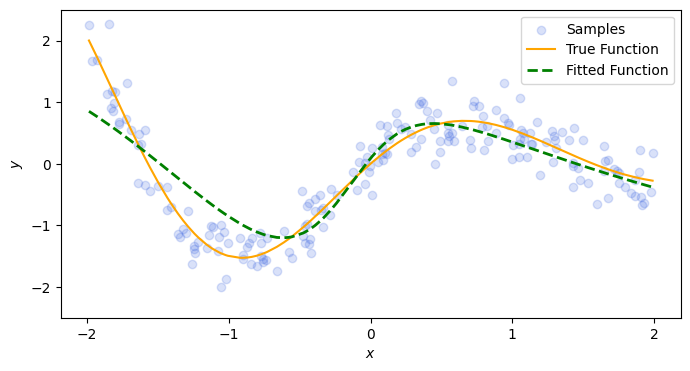

In [24]:
func_fit = model(x).numpy() # 需要将 tf.Tensor 数据转换为 np.ndarray
ch1.regression_plot(x,y,func,x,func_fit)

**这与我们在第2节中实现的步骤几乎相同，只不过我们无需手动计算梯度了，借助自动梯度我们能一次性完成所有参数的更新**

此外，请注意**使用Tensorflow框架时，请保证**：
* **所有的计算都必须使用Tensorflow提供的接口完成**，Tensorflow的接口与numpy非常相似，没有学习成本
* **参与模型计算的所有变量都必须是**`tf.Tensor`，我们可以使用`tf.Varialbe`或者`tf.constant`来创建Tensor张量，不能将`tf.Tensor`与`np.ndarray`混合使用，否则会报错
  * `tf.Varialbe`或者`tf.constant`可以将`np.ndarray`转换为Tensor张量，区别在于转换后的Tensor一种是变量，一种是常量
    * 通常来说，数据样本可以用`tf.constant`变换为常量
    * 模型参数可以用`tf.Variable`转换为变量
  * 如果要将Tensor张量`X`转换为`np.ndarray`，请使用`X.numpy()`方法
* 同一个模型中，**参数**和**样本数据**的**数据类型必须相同**，默认情况下建议使用`tf.float32`
  * 如果两种数据类型混合计算（例如`tf.float32`和`tf.float64`混用），程序会报错

#### **3.2.3 高层级API**

Tensorflow还提供了另外一种**高层级API接口帮助我们快速创建模型，高层级API整合了最常用的模型计算层，损失函数和优化算法**，它们大部分包含在`keras`模块中，我们首先导入它们

In [25]:
from keras.models import Sequential # 序列模型
from keras.layers import Input, Dense # MLP / FCN全连接层
from keras.activations import sigmoid # 激活函数
from keras.losses import mean_squared_error # 均方误差
from keras.optimizers import SGD # 随机梯度下降优化算法

假设隐藏层神经元个数为8，通过序列模型`Sequential`组装计算层

In [26]:
hidden_size = 8
model = Sequential([
    Input(shape=(1)), # 输入层，特征维度为 1
    Dense(hidden_size,activation=sigmoid), # 设置隐藏层，并设置激活函数
    Dense(1) # 设置输出层，输出维度为 1
])

`model.summary()`可以查看模型的结构和参数信息

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


下一步，我们使用`model.compile()`**编译模型**，指定模型所使用的**损失函数，优化算法，度量指标**

In [28]:
# 编译模型
x, y, func = ch1.build_regression(N=200,add_dims=False)
x, y = tf.constant(x,dtype=tf.float32), tf.constant(y,dtype=tf.float32)
model.compile(optimizer=SGD(learning_rate=0.1),loss=mean_squared_error,metrics=mean_squared_error)

最后提供数据集，使用`model.fit()`方法训练模型，这里可以指定：
* **批量大小**`batch_size`，**迭代轮次**`epochs`
* 从**训练数据集中划分验证集的大小**`validation_split`，默认为`0`，即不使用验证集
* 或者**直接提供验证集**`validation_data`

更多参数可以查看说明文档

In [29]:
# 训练模型
model.fit(x=x,y=y,batch_size=32,epochs=300)

Epoch 1/300
7/7 [==============================] - 0s 2ms/step - loss: 1.0848 - mean_squared_error: 1.0848
Epoch 2/300
7/7 [==============================] - 0s 1ms/step - loss: 0.7628 - mean_squared_error: 0.7628
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7656 - mean_squared_error: 0.7656
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7598 - mean_squared_error: 0.7598
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7542 - mean_squared_error: 0.7542
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7822 - mean_squared_error: 0.7822
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7301 - mean_squared_error: 0.7301
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7611 - mean_squared_error: 0.7611
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7482 - mean_squared_error: 0.7482
Epoch 10/300
7/7 [===================

**高层级API经过开发工程师的优化，执行效率非常高**，在掌握算法的原理和计算逻辑后，**大部分不需要自定义模型的场合，建议使用高层级API来搭建模型**，以保证计算效率，当然，一些定制化的模型和计算逻辑还是离不开低层级API，二者也可以混合使用

最后，`model.predict()`或者`model.__call__()`方法能够进行预测

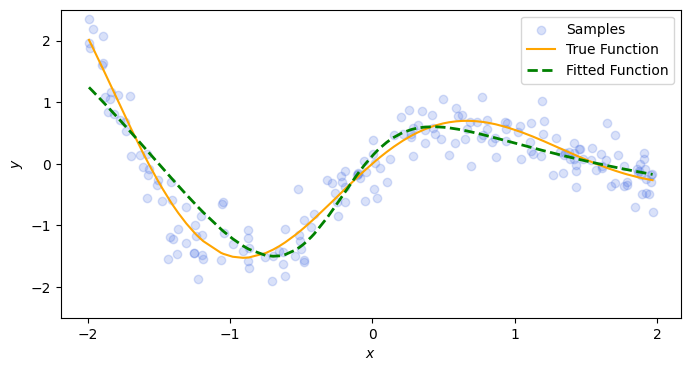

In [30]:
func_fit = model(x).numpy() # 需要将 tf.Tensor 数据转换为 np.ndarray
ch1.regression_plot(x,y,func,x,func_fit)

#### **3.2.4 混合使用低层级API和高层级API**

这是**更常见**的一种使用方式，简单来说，我们可以调用`Tensorflow`提供的各种**损失函数**、**优化器**接口，而无需自己定义，唯一需要定义的就是**模型的计算逻辑**，即`__call__()`方法中的计算逻辑，模型的训练函数`train()`在借助高层级API时写起来也更方便

总之，深度学习的计算模块搭建非常灵活，要学会灵活应用各种接口，并把计算过程中的一些局部抽象为整体的块儿(`Block`)，则模型的定义只是在组装这些`Blocks`

In [31]:
# 导入高层级API
from keras.losses import MeanSquaredError
from keras.optimizers import SGD
from keras.layers import Dense
from keras.activations import sigmoid

接下来定义模型，记住让模型继承自`tf.keras.Model`或者`tf.keras.layers.Layer`

In [32]:
class MixedAPIANN(tf.keras.Model):
    def __init__(self, input_dims : int=1, output_dims : int=1, hidden_size : int=8, *args, **kwargs):
        super().__init__(*args,**kwargs)
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.hidden_size = hidden_size

        self.dense1 = Dense(hidden_size,activation=sigmoid) # 设置激活函数
        self.dense2 = Dense(output_dims)
    
    def call(self, inputs, training=None, mask=None):
        X = self.dense1(inputs)
        y = self.dense2(X)
        return y

In [33]:
def train(model, X : tf.Tensor, y : tf.Tensor, batch_size : int=32, epochs : int=200, lr : float=0.1):
    optimizer = SGD(learning_rate=lr) # 创建优化器
    mse = MeanSquaredError() # 实例化损失函数

    for epoch in range(epochs):
        # 使用 Tensorflow API 创建批量数据的生成器
        batch_data = tf.data.Dataset.from_tensor_slices((X,y)).batch(batch_size=batch_size).shuffle(buffer_size=batch_size)
        for x_batch, y_batch in batch_data:
            # 跟踪梯度
            with tf.GradientTape() as tape:
                y_hat = model(x_batch)
                loss = mse(y_batch,y_hat)
            
            # 选取参数，计算梯度
            weights = model.trainable_variables
            grads = tape.gradient(loss,weights)
            optimizer.apply_gradients(zip(grads,weights)) # 直接调用优化器 API
    
    return model

最后再补充说明：
* 上面模型的`train()`方法逻辑，在大部分情况下，几乎不需要改变，它对任意模型通用
* 我们应该**关注模型计算逻辑的定义**，这包含两部分：
  * 在`__init__()`方法中，**定义好模型计算所需要的层和块**（例如`Dense()`等），以及参数
  * 在`call()`方法中，定义好模型的推理逻辑

最后，创建模型和数据集，并训练模型

In [34]:
# 生成数据
x, y, func = ch1.build_regression(N=200)
x, y = tf.constant(x,dtype=tf.float32), tf.constant(y,dtype=tf.float32)
# 创建模型并训练
model = MixedAPIANN(hidden_size=8)
model = train(model,X=x,y=y,epochs=200,lr=0.1,batch_size=32)

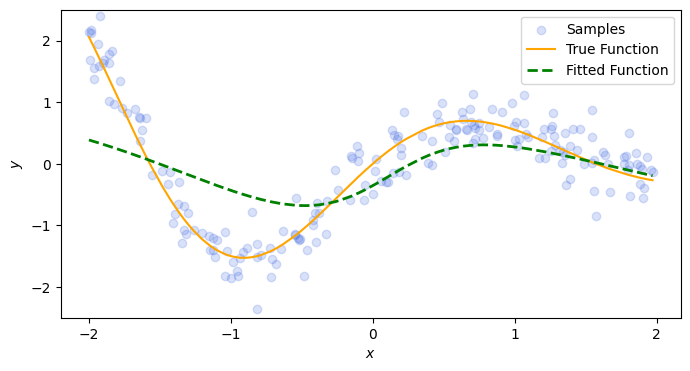

In [35]:
func_fit = model(x).numpy() # 需要将 tf.Tensor 数据转换为 np.ndarray
ch1.regression_plot(x,y,func,x,func_fit)

----

### **练习**

1. 设计一个单隐藏层神经网络，隐藏神经元个数等于2，并确定模型参数，以解决XOR问题

2. 尝试调整第2节中解决回归问题的ANN的隐藏层神经元个数，查看拟合效果与隐藏神经元个数的关系，你可以用任何方法实现该神经网络（手动计算梯度，低层级API，高层级API，混合API，推荐使用混合API）

3. 使用`ch1_build_classification()`生成二维二分类数据集，完成下面的任务：
   1. 在3.2节模型的基础上，使用低层级API搭建一个单隐藏层神经网络，用于解决该二分类问题
      * 回顾机器学习相关知识，为了对二分类问题的概率分布建模，神经网络的输出层 $f(x)$ 还需要施加什么额外变换？
      * 模型应该使用什么损失函数？
   2. 汇报模型在训练集和测试集上的准确率
   3. 绘制训练集和测试集的损失函数值随着迭代次数`epochs`的变换情况
   4. 用高层级API实现上面的神经网络分类模型
   5. 绘制神经网络模型的决策边界

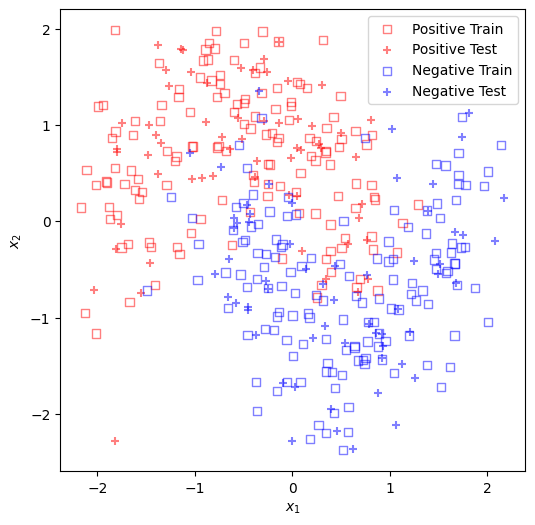

In [36]:
# 生成二分类数据集
X_train, X_test, y_train, y_test = ch1.build_classification(N=400,noise=0.3,show=True)

----